In [3]:
# conceptos
# overfitting and underfitting: https://www.aprendemachinelearning.com/que-es-overfitting-y-underfitting-y-como-solucionarlo/

In [4]:
# Run some setup code for this notebook.

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import pandas as pd
from linear_classifiers.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [8]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'linear_classifiers/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


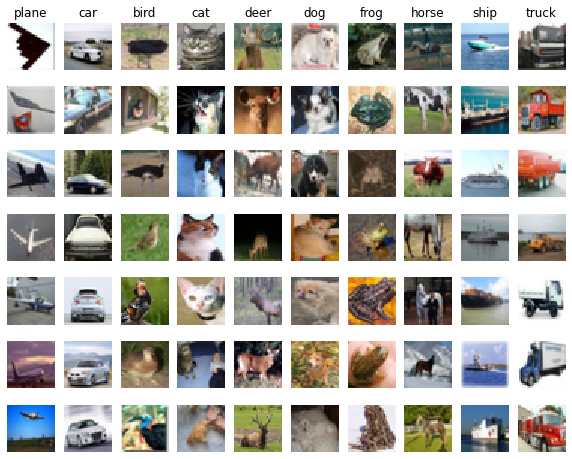

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5550
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5550, 3072) (500, 3072)


In [12]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1)

In [13]:
X_dev.shape

(555, 3072)

In [14]:
pd.DataFrame(y_train).value_counts(normalize=True)

6    0.103904
9    0.102903
4    0.102302
8    0.102302
0    0.100901
7    0.100701
2    0.099900
3    0.097497
5    0.095495
1    0.094094
dtype: float64

In [15]:
label, counts = np.unique(y_train, return_counts=True)
print(len(label))
for x,y in zip ([classes[i] for i in label], counts/(sum(counts))):
    print(f"class: {x} - {np.round(y,2)*100}%")

10
class: plane - 10.0%
class: car - 9.0%
class: bird - 10.0%
class: cat - 10.0%
class: deer - 10.0%
class: dog - 10.0%
class: frog - 10.0%
class: horse - 10.0%
class: ship - 10.0%
class: truck - 10.0%


In [16]:
label, counts = np.unique(y_test, return_counts=True)
print(len(label))
for x,y in zip ([classes[i] for i in label], counts/(sum(counts))):
    print(f"class: {x} - {np.round(y,2)*100}%")

10
class: plane - 11.0%
class: car - 8.0%
class: bird - 10.0%
class: cat - 10.0%
class: deer - 8.0%
class: dog - 10.0%
class: frog - 11.0%
class: horse - 9.0%
class: ship - 11.0%
class: truck - 11.0%


In [17]:
label, counts = np.unique(y_dev, return_counts=True)
print(len(label))
for x,y in zip ([classes[i] for i in label], counts/(sum(counts))):
    print(f"class: {x} - {np.round(y,2)*100}%")

10
class: plane - 10.0%
class: car - 7.000000000000001%
class: bird - 13.0%
class: cat - 10.0%
class: deer - 10.0%
class: dog - 11.0%
class: frog - 11.0%
class: horse - 7.000000000000001%
class: ship - 11.0%
class: truck - 10.0%


In [50]:
pd.DataFrame(X_train/255)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.349020,0.180392,0.223529,0.329412,0.156863,0.200000,0.333333,0.164706,0.207843,0.349020,...,0.278431,0.450980,0.274510,0.309804,0.407843,0.266667,0.298039,0.419608,0.294118,0.313725
1,0.223529,0.239216,0.125490,0.458824,0.486275,0.317647,0.509804,0.541176,0.360784,0.505882,...,0.188235,0.200000,0.219608,0.078431,0.250980,0.270588,0.156863,0.301961,0.337255,0.149020
2,0.482353,0.643137,0.843137,0.494118,0.639216,0.843137,0.505882,0.647059,0.854902,0.505882,...,0.749020,0.878431,0.768627,0.694118,0.905882,0.788235,0.717647,0.909804,0.788235,0.717647
3,0.450980,0.474510,0.254902,0.411765,0.474510,0.243137,0.396078,0.454902,0.207843,0.517647,...,0.411765,0.490196,0.505882,0.356863,0.647059,0.678431,0.564706,0.560784,0.568627,0.486275
4,0.145098,0.152941,0.058824,0.168627,0.176471,0.070588,0.290196,0.290196,0.109804,0.380392,...,0.596078,0.572549,0.552941,0.580392,0.517647,0.505882,0.549020,0.509804,0.498039,0.545098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,0.301961,0.345098,0.313725,0.239216,0.282353,0.250980,0.149020,0.192157,0.160784,0.113725,...,0.278431,0.341176,0.345098,0.321569,0.305882,0.309804,0.294118,0.321569,0.317647,0.301961
4991,0.494118,0.674510,0.976471,0.388235,0.564706,0.870588,0.403922,0.580392,0.886275,0.509804,...,0.862745,0.603922,0.647059,0.831373,0.619608,0.662745,0.847059,0.592157,0.639216,0.819608
4992,0.839216,0.823529,0.827451,0.850980,0.835294,0.839216,0.862745,0.847059,0.850980,0.870588,...,0.486275,0.494118,0.513725,0.486275,0.501961,0.521569,0.494118,0.501961,0.517647,0.490196
4993,0.317647,0.203922,0.168627,0.282353,0.235294,0.180392,0.125490,0.149020,0.105882,0.164706,...,0.235294,0.341176,0.215686,0.180392,0.368627,0.227451,0.188235,0.294118,0.219608,0.176471


In [51]:
X_train = X_train/255
X_dev = X_dev/255
X_test = X_test/255

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [60]:
clf_knn = KNeighborsClassifier(n_neighbors=9)

In [61]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [62]:
predict_y_valid = clf_knn.predict(X_dev)

In [63]:
accuracy_score(y_dev, predict_y_valid)

0.2954954954954955

In [64]:
accuracy_score(y_dev, predict_y_valid)

0.2954954954954955

In [ ]:
# LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf_logistic = LogisticRegression()

In [69]:
clf_logistic.fit(X_train, y_train)

D:\UNI\AI\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [71]:
pred_y_valid = clf_logistic.predict(X_dev)

In [72]:
accuracy_score(y_dev, pred_y_valid)

0.34774774774774775

In [73]:
from sklearn.svm import SVC

In [74]:
clf_SVC = SVC()

In [75]:
clf_SVC.fit(X_train,y_train)

SVC()

In [76]:
pred_y_valid = clf_SVC.predict(X_dev)

In [77]:
accuracy_score(y_dev, pred_y_valid)

0.3963963963963964